In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt



In [ ]:
dataset=pd.read_csv('/content/tesla.csv')

In [ ]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
dataset.shape

(2193, 7)

In [ ]:
dataset.drop('Adj Close',axis=1,inplace=True)

In [ ]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,6866900


In [ ]:
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2193 non-null   object 
 1   Open    2193 non-null   float64
 2   High    2193 non-null   float64
 3   Low     2193 non-null   float64
 4   Close   2193 non-null   float64
 5   Volume  2193 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 102.9+ KB


In [ ]:
dataset.describe()

,Open,High,Low,Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,3.716390e+07


<Axes: >

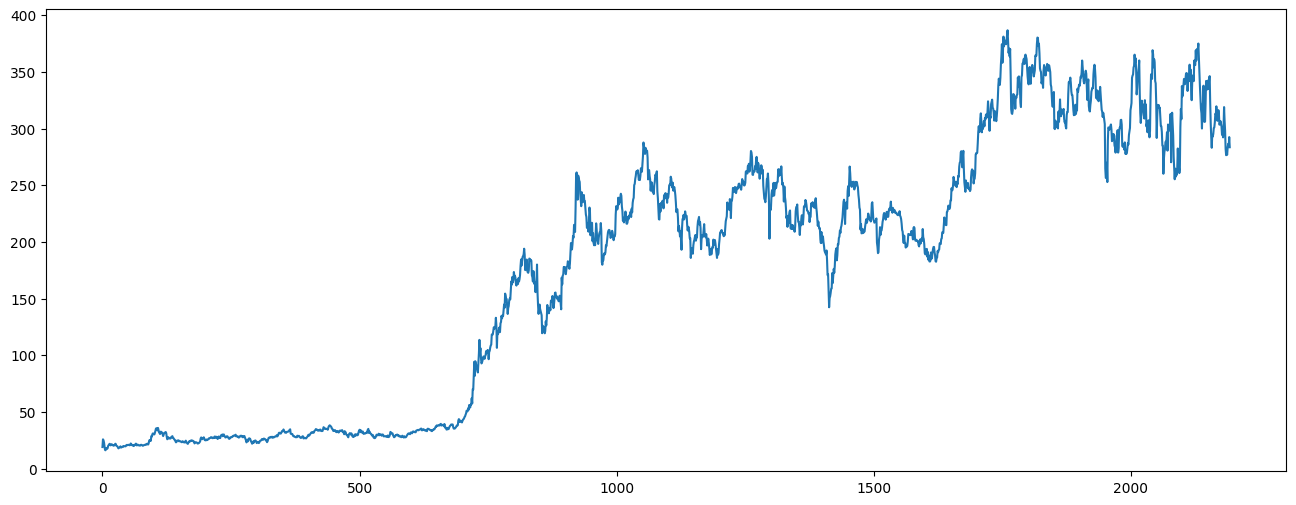

In [ ]:
dataset['Open'].plot(figsize=(16,6))

In [ ]:
x=dataset[['Open','High','Low','Volume']]
y=dataset['Close']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [ ]:
x_train.shape

(1644, 4)

In [ ]:
x_test.shape


(549, 4)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
reg=LinearRegression()

In [ ]:
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(reg.coef_)

[-6.42175332e-01  8.64054374e-01  7.77715846e-01 -1.19541878e-08]


In [ ]:
print(reg.intercept_)

0.02718186253781596


In [ ]:
predicted=reg.predict(x_test)

In [ ]:
print(x_test)

            Open        High         Low   Volume
489    28.200001   29.450001   28.139999   909900
1063  263.359985  265.600006  262.320007  3692600
1986  284.649994  284.649994  274.000000  7251900
1888  316.000000  317.679993  310.750000  4712100
385    27.200001   27.790001   26.410000   986300
...          ...         ...         ...      ...
1027  226.610001  228.300003  224.860001  3382400
1654  250.000000  254.800003  249.649994  4965500
1967  291.290009  291.619995  282.329987  4893400
654    38.400002   38.419998   37.590000  1128000
1318  261.950012  262.079987  257.579987  2600800

[549 rows x 4 columns]


In [ ]:
predicted.shape

(549,)

In [ ]:
dframe=pd.DataFrame(y_test,predicted)

In [ ]:
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':predicted})

In [ ]:
print(dfr)

      Actual Price  Predicted Price
489      29.219999        29.238285
1063    263.820007       264.363027
1986    276.820007       276.192501
1888    311.640015       313.211434
385      26.910000        27.099769
...            ...              ...
1027    225.009995       226.604197
1654    254.610001       253.741804
1967    283.369995       284.457464
654      37.740002        37.785469
1318    261.059998       258.553652

[549 rows x 2 columns]


In [ ]:
dfr.head(25)

,Actual Price,Predicted Price
489,29.219999,29.238285
1063,263.820007,264.363027
1986,276.820007,276.192501
1888,311.640015,313.211434
385,26.910000,27.099769
1296,230.770004,238.322758
1990,277.850006,277.876277
1442,234.240005,235.011127
579,27.639999,28.040438
1490,223.229996,223.223340


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
reg.score(x_test,y_test)*100

99.97296742787886

In [ ]:
import math

In [ ]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 1.2846115070995283


In [ ]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 1.894311494399212


In [ ]:
graph=dfr.head(20)

<Axes: >

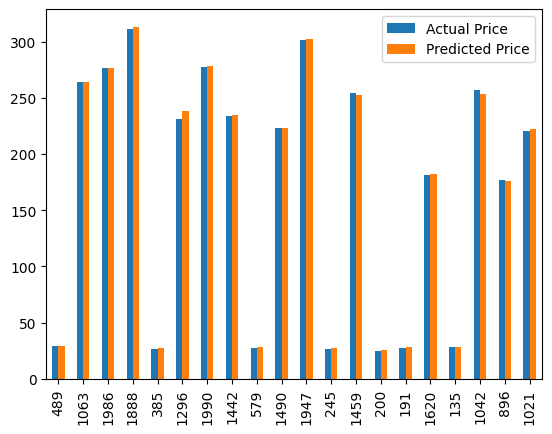

In [ ]:
graph.plot(kind="bar")

In [ ]:
dfr.head(100)

,Actual Price,Predicted Price
489,29.219999,29.238285
1063,263.820007,264.363027
1986,276.820007,276.192501
1888,311.640015,313.211434
385,26.910000,27.099769
...,...,...
1508,193.149994,194.048071
182,22.959999,22.670717
1273,266.769989,270.153737
1755,369.799988,370.666312


In [ ]:
graph=dfr.head(40)

<Axes: >

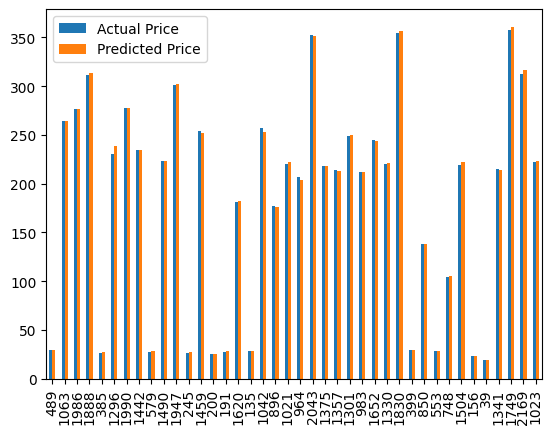

In [ ]:
graph.plot(kind='bar')